In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/workspace/deep_birth_death/src/')

In [3]:
import pickle
import itertools
import time
import os
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.classification import generate_class_results, generate_class_results_calibrated_model, get_classification_results, plot_conf_mat, train_plot

# Results generation

In [4]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/simulations/'
res_path = "/workspace/deep_birth_death/deep_learning/models/class/"

n_tips = ['674', '489', '87']

n_trees_tested = 6000
results = dict()
results_calibrated_model = dict()

for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)

    results[i] = dict()
    results_calibrated_model[i] = dict()
        
    model_path = res_path + i + "_classification_"

    print('---', i, 'tips ---')
    results[i] = generate_class_results(model_path, data['X_test'][:n_trees_tested],
                                        data['y_class_test'][:n_trees_tested])
    
    
    results_calibrated_model[i] = generate_class_results_calibrated_model(model_path, data['X_test'][:n_trees_tested],
                                        data['y_class_test'][:n_trees_tested])

--- 674 tips ---
--- Testing time normal model:  2.90305233001709 seconds ---


/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


--- Testing time temperature model:  1.3896770477294922 seconds ---
--- 489 tips ---
--- Testing time normal model:  0.3706398010253906 seconds ---


/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


--- Testing time temperature model:  0.6684894561767578 seconds ---
--- 87 tips ---
--- Testing time normal model:  0.2636086940765381 seconds ---
--- Testing time temperature model:  0.4475595951080322 seconds ---


/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:130: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


In [5]:
[results[i]['train_time'] for i in n_tips],

([865.7000346183777, 1440.3192870616913, 939.8953239917755],)

In [5]:
for i in n_tips: 
    print(i)
    print(results[i]['train_time'] )

674
865.7000346183777
489
1440.3192870616913
87
939.8953239917755


### Save the temperature values for penalize the empirical predictions

In [6]:
for i in n_tips:
    print(i + " tips classification model temperature: " + str(results_calibrated_model[i]["temperature"]))
    
    with open("/workspace/deep_birth_death/deep_learning/temperatures/temperature_" + i +".txt", "w") as archivo:
        archivo.write(str(results_calibrated_model[i]["temperature"]))

674 tips classification model temperature: 1.0463164
489 tips classification model temperature: 1.0009997
87 tips classification model temperature: 1.0009998


# Results summary

In [7]:
get_classification_results(results)

,674,489,87
accuracy,0.939833,0.924,0.786833
F1-Score,0.939329,0.923171,0.784517
Recall,0.939557,0.923716,0.788537
Precision,0.939697,0.923733,0.7832
Number of params,53110,14006,11446
Train time,865.700035,1440.319287,939.895324


# Confusion Matrices

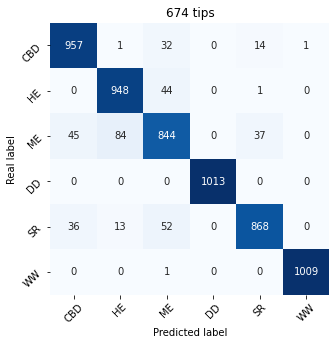

              precision    recall  f1-score   support

           0     0.9220    0.9522    0.9369      1005
           1     0.9063    0.9547    0.9299       993
           2     0.8674    0.8356    0.8512      1010
           3     1.0000    1.0000    1.0000      1013
           4     0.9435    0.8958    0.9190       969
           5     0.9990    0.9990    0.9990      1010

    accuracy                         0.9398      6000
   macro avg     0.9397    0.9396    0.9393      6000
weighted avg     0.9398    0.9398    0.9395      6000



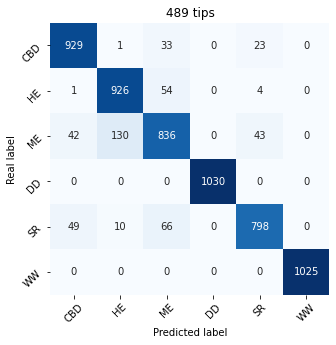

              precision    recall  f1-score   support

           0     0.9099    0.9422    0.9258       986
           1     0.8679    0.9401    0.9025       985
           2     0.8453    0.7954    0.8196      1051
           3     1.0000    1.0000    1.0000      1030
           4     0.9194    0.8646    0.8911       923
           5     1.0000    1.0000    1.0000      1025

    accuracy                         0.9240      6000
   macro avg     0.9237    0.9237    0.9232      6000
weighted avg     0.9240    0.9240    0.9235      6000



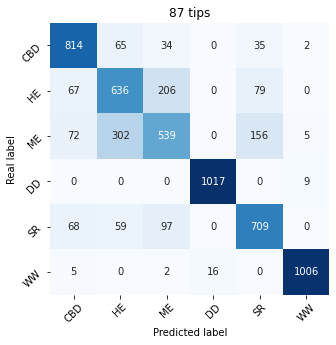

              precision    recall  f1-score   support

           0     0.7934    0.8568    0.8239       950
           1     0.5989    0.6437    0.6205       988
           2     0.6139    0.5019    0.5523      1074
           3     0.9845    0.9912    0.9879      1026
           4     0.7242    0.7599    0.7416       933
           5     0.9843    0.9776    0.9810      1029

    accuracy                         0.7868      6000
   macro avg     0.7832    0.7885    0.7845      6000
weighted avg     0.7839    0.7868    0.7840      6000



In [9]:
label_names = ["CBD", "HE", "ME", "DD", "SR", "WW"]
for i in results:
    plot_conf_mat((results[i]["y_pred"]), (results[i]["y_test"]), label_names, i)

# Train History

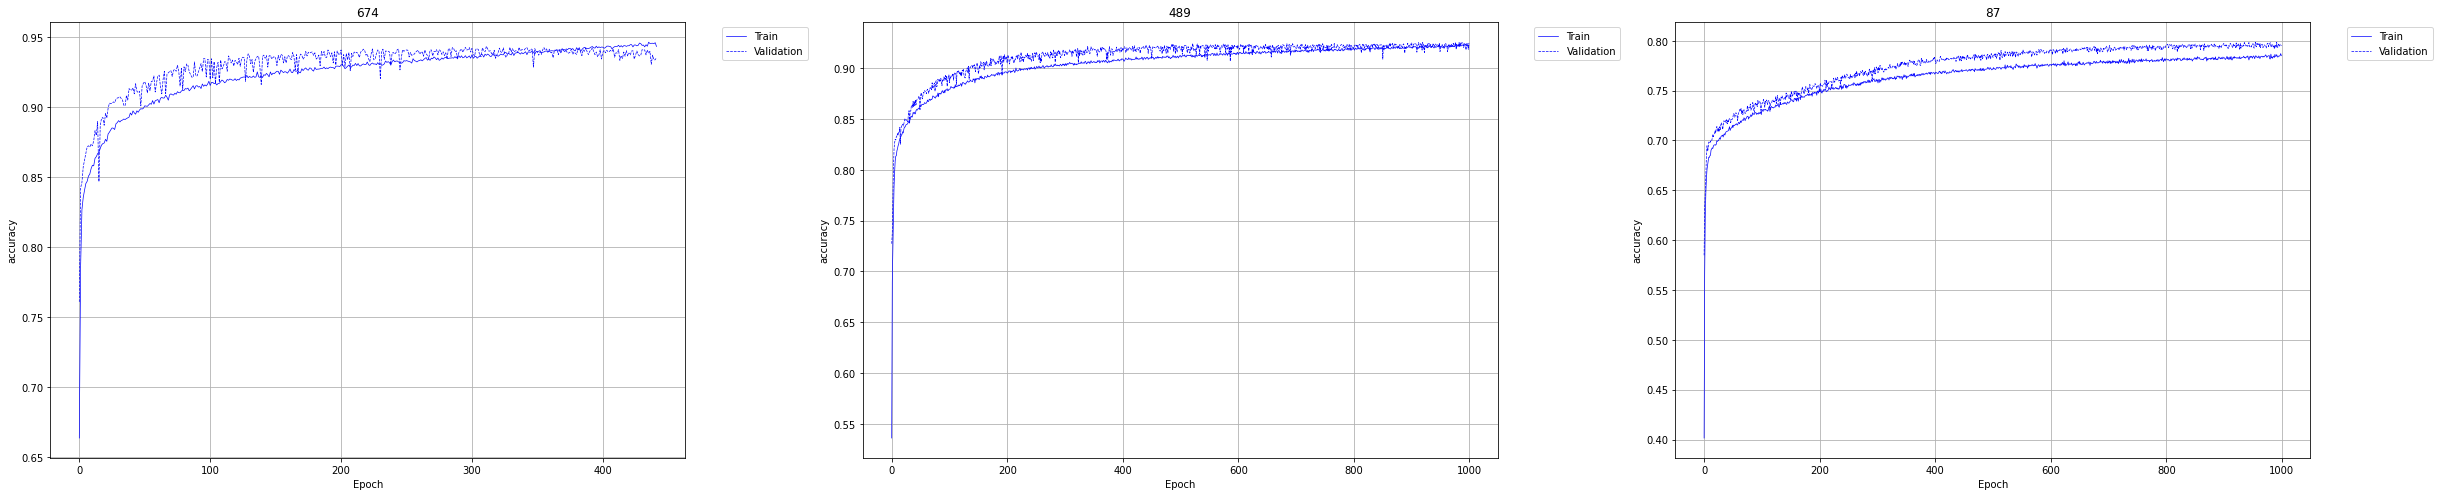

In [27]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'accuracy', results)
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

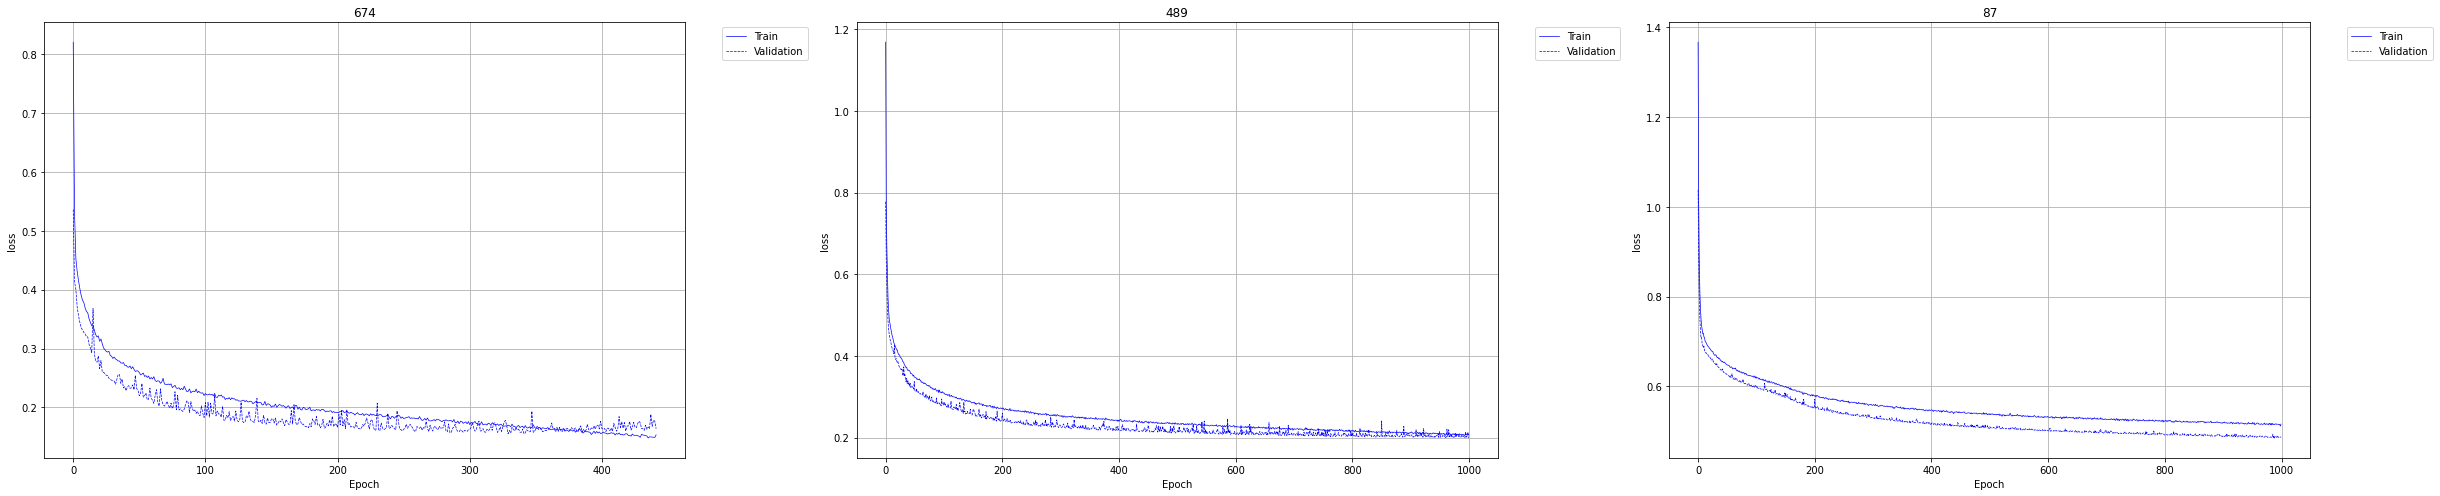

In [28]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'loss', results)
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Results stratified

<AxesSubplot:xlabel='N_tips'>

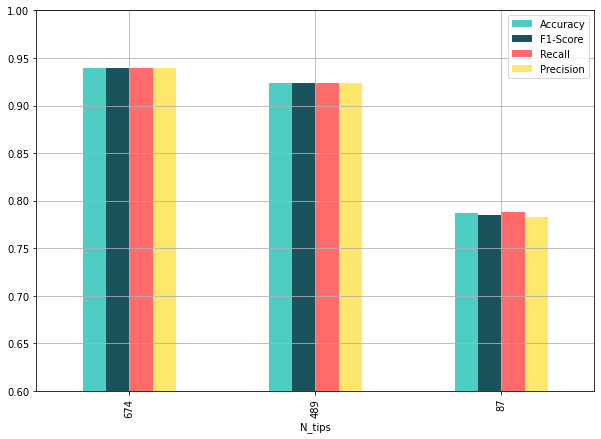

In [29]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Accuracy': [results[i]['accuracy'] for i in n_tips],
    'F1-Score': [results[i]['f1-score'] for i in n_tips],
    'Recall': [results[i]['recall'] for i in n_tips],
    'Precision': [results[i]['precision'] for i in n_tips],
})

df.plot(x="N_tips", y=["Accuracy", "F1-Score", "Recall", "Precision"], kind="bar",
        color=['#4ECDC4','#1A535C','#FF6B6B','#FFE66D'], figsize=(10,7),
        ylim=(0.6, 1), grid=True)

### Number of Params

<AxesSubplot:xlabel='N_tips'>

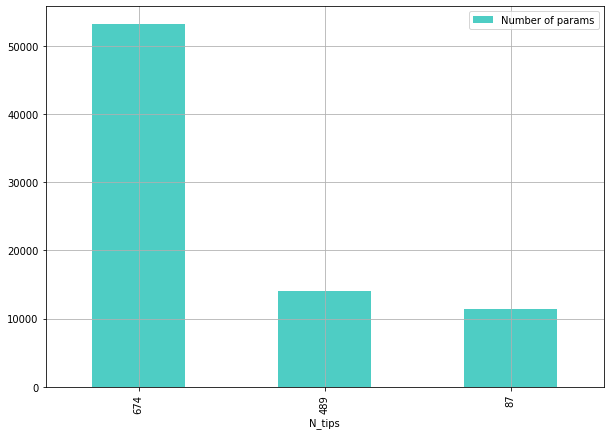

In [30]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Number of params': [results[i]['n_params'] for i in n_tips],
})

df.plot(x="N_tips", y=["Number of params"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)

### Training time

<AxesSubplot:xlabel='N_tips'>

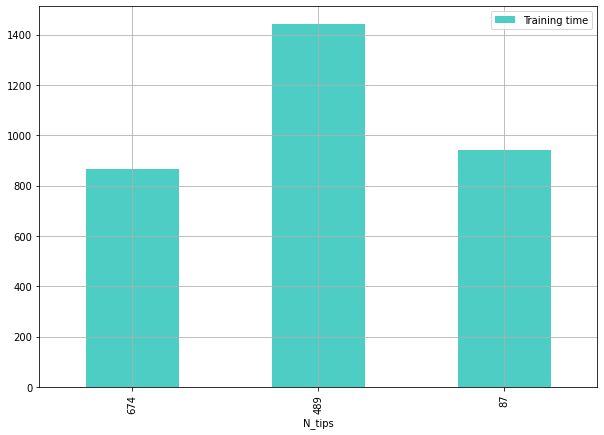

In [31]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Training time': [results[i]['train_time'] for i in n_tips],
})
print(df)
df.plot(x="N_tips", y=["Training time"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)